# Calcul approché des probabilités par simulation

## 1 Introduction

(à faire)

In [2]:
import random
def jet2d():
    de1 = random.choice([1,2,3,4,5,6])
    de2 = random.choice([1,2,3,4,5,6])
    return (de1,de2)
realisation = jet2d()
print(realisation)

(1, 3)


In [4]:
def testA(des):
    d1 = des[0]
    d2 = des[1]
    res = (d1 == d2 or d2 == d1 + 1 or d1 == d2+1)
    return res

resTest = testA(realisation)

print(resTest)

False


In [7]:
compteur = 0
for i in range(1000):
    res = testA(jet2d())
    if res == True :
        compteur += 1
print("Estimation de la probabilité : {}".format(compteur/1000))

Estimation de la probabilité : 0.421


## 2 Exercices pratiques

### 2.1 Travaux préliminaires

#### 2.1.1 Simulation répétée de l’expérience

In [18]:
def simulrepExemple(n: int) -> float:
    compteur = 0
    for i in range(n):
        res = testA(jet2d())
        if res == True :
            compteur += 1
    return compteur/n

In [35]:
print(simulrepExemple(10))
print(simulrepExemple(100))
print(simulrepExemple(1000))
print(simulrepExemple(10000))

0.3
0.48
0.465
0.439


#### 2.1.2 Convergence

In [39]:
def convergence(nmax: int) -> list:
    return [simulrepExemple(nmax) for x in range(nmax)]

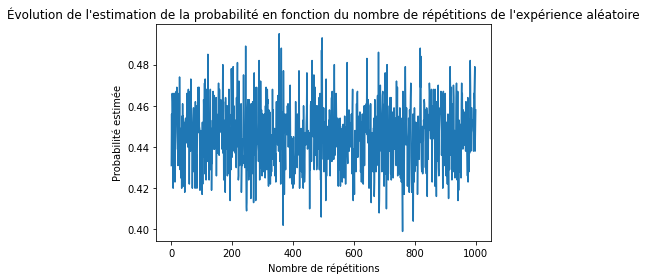

In [43]:
import matplotlib.pyplot as plt
N = 1000
x = list(range(1,N+1))
y = convergence(N)
plt.figure()
plt.plot(x,y)
plt.xlabel("Nombre de répétitions")
plt.ylabel("Probabilité estimée")
plt.title("Évolution de l'estimation de la probabilité en fonction du nombre de répétitions de l'expérience aléatoire")
plt.show()